In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar7/homework/TCGA-COAD_cancer_normal.tsv", sep="\t", index_col = 0)
gl = pd.read_csv("https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar7/homework/gene_lengths.tsv", sep="\t", index_col=0).sort_index()

In [3]:
RPM = df.div(df.sum(axis=0) / 10**6, axis=1)
RPKM = RPM.div(gl["Length"] / 10**3, axis=0)

In [4]:
size_factors = [0.35219656, 0.39439086, 0.73057344, 1.66138079, 1.60002838, 1.48313616, 1.28046971, 0.92434274, 1.59306799, 1.34997698]
RPKM = RPKM.div(size_factors, axis=1)

In [5]:
df = np.log2(RPKM + 1)
df = df.loc[df.max(axis=1) > 0]
df["median"] = df.median(axis=1)
df = df.sort_values("median", ascending=False)
df = df.iloc[:len(df)//2]

normalized:

In [7]:
df_normalized = df.div(df['median'], axis = 0)

In [8]:
df["LFC"] = df.iloc[:, 0:5].mean(axis=1) - df.iloc[:, 5:10].mean(axis=1)
df["absLFC"] = np.abs(df["LFC"])
df = df.sort_values("absLFC", ascending=False)

In [9]:
df_normalized["LFC"] = df_normalized.iloc[:, 0:5].mean(axis=1) - df_normalized.iloc[:, 5:10].mean(axis=1)
df_normalized["absLFC"] = np.abs(df_normalized["LFC"])
df_normalized = df_normalized.sort_values("absLFC", ascending=False)

top-100:

In [44]:
df_norm_100 = df_normalized['absLFC'].head(100).to_frame()
df_100 = df['absLFC'].head(100).to_frame()

In [45]:
df_100.reset_index(level=0, inplace = True)
df_norm_100.reset_index(level=0, inplace = True)

In [46]:
df_100 = df_100['Gene'].to_frame()
df_norm_100 = df_norm_100['Gene'].to_frame()

In [47]:
common = df_100.merge(df_norm_100)

In [48]:
common

,Gene
0,CST1
1,KRT8P36
2,KRT23
3,KLK10
4,VWA2
5,MT-TM
6,CLDN2


let's transfer df into array:

In [49]:
common = ['CST1','KRT8P36','KRT23','KLK10','VWA2','MT-TM','CLDN2']

In [53]:
df_norm_100 = df_normalized['absLFC'].head(100).to_frame()
df_100 = df['absLFC'].head(100).to_frame()
df_100.reset_index(level=0, inplace = True)
df_norm_100.reset_index(level=0, inplace = True)

In [55]:
df_norm_100 = df_norm_100.loc[df_norm_100['Gene'].isin(common)]
df_100 = df_100.loc[df_100['Gene'].isin(common)]

In [56]:
df_norm_100

,Gene,absLFC
24,KRT23,9.288985
39,CLDN2,8.131942
44,MT-TM,7.857850
45,VWA2,7.817157
51,KRT8P36,7.597635
77,CST1,6.996676
83,KLK10,6.776866


In [67]:
norm_list = df_norm_100['absLFC'].tolist()
non_norm_list = df_100['absLFC'].tolist()

In [69]:
df1 = pd.DataFrame({'Gene': common, 'norm': norm_list, 'non-norm': non_norm_list})

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

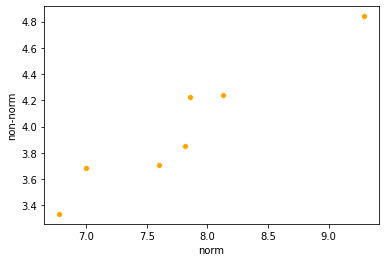

In [71]:
sns.scatterplot(data = df1, x = 'norm', y = 'non-norm', color = 'Orange')
plt.tight_layout